## 1. Loading Data and Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
import matplotlib.patches as mpatches
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [1]:
from google import colab
colab.drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Load train and Test set
import os 
path = '/content/gdrive/My Drive/colab/credit_score_zalda'


In [5]:
df = pd.read_excel(path+'/MOCK_DAT.xlsx')
df.head()

,id,first_name,last_name,email,gender,ip_address,Age,Years_in_job,Income,Province,Marital_status,Savings,Home_ownership,Credit_history,Number_of_accs,Open_accounts,Credit_cards,Home_loan,Overdraft,Student_Loan,Perfoming_Accs,Non_perfoming_Accs,Unnamed: 22,Closed_Accs,Open Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,No_of_enquiries,Score,Grade,Def
0,1,Germayne,Doblin,gdoblin0@bizjournals.com,Male,171.82.187.226,48,23,123970,Nairobi,Divorced,264110,Own Home,18,79,4,2,0,1,0,75,4,0.053333,77,2,0,12400,0.0,23,728,AA,0
1,2,Roshelle,Arnoult,rarnoult1@bigcartel.com,Female,130.18.85.204,37,14,101907,Nairobi,Divorced,101922,Rent,6,22,5,0,0,1,0,15,7,0.466667,20,2,2,15300,4590.0,23,428,GG,1
2,3,Barbey,Duffield,bduffield2@bing.com,Female,91.127.97.73,39,14,97331,Nairobi,Divorced,112457,Mortgage,11,36,4,0,1,1,0,25,11,0.440000,33,3,0,14600,0.0,10,630,DD,0
3,4,Vivianne,Gibbin,vgibbin3@g.co,Female,78.76.67.146,38,11,106189,Nairobi,Divorced,108758,Rent,10,32,4,0,0,0,0,22,10,0.454545,30,2,2,21200,6360.0,27,504,FF,0
4,5,Huntlee,Seman,hseman4@sun.com,Male,165.136.97.253,25,2,55705,Central,Single,3793,Rent,1,1,1,0,0,0,1,1,0,0.000000,0,1,1,16700,11690.0,2,592,EE,0


In [6]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address', 'Age',
       'Years_in_job', 'Income', 'Province', 'Marital_status', 'Savings',
       'Home_ownership', 'Credit_history', 'Number_of_accs', 'Open_accounts',
       'Credit_cards', 'Home_loan', 'Overdraft', 'Student_Loan',
       'Perfoming_Accs', 'Non_perfoming_Accs', 'Unnamed: 22', 'Closed_Accs',
       'Open Accounts', 'Current_In_Arrears', 'Current_balance_Amt',
       'Past_due_Amt', 'No_of_enquiries', 'Score', 'Grade', 'Def'],
      dtype='object')

In [7]:
# for column_1st in df:
#     for coloum_2nd in df:
#         jet=plt.get_cmap('jet')
#         plt.figure(figsize=(15,5))
#         plt.scatter(df[column_1st], df[coloum_2nd], s=30, c=df['Score'], vmin=0, vmax=1, cmap=jet)
#         plt.xlabel(column_1st,fontsize=40)
#         plt.ylabel(coloum_2nd,fontsize=40)
#         plt.colorbar()
#         plt.show()

In [8]:
df.Score.value_counts()

661    64
681    61
671    61
709    56
701    54
       ..
209     1
236     1
243     1
250     1
252     1
Name: Score, Length: 553, dtype: int64

In [9]:
df.shape

(10000, 32)

In [10]:
##missing data
total = df.count()
sumcol=df.isnull().sum()
countcol=df.isnull().count()

percent = (df.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
missing_data.sort_values(['Percent'], axis=0, ascending=False)
#missing_data.head(20)

miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
miss_perc

,Total,Percent,Sumcol,countcol
id,10000,0.0,0,10000
first_name,10000,0.0,0,10000
Grade,10000,0.0,0,10000
Score,10000,0.0,0,10000
No_of_enquiries,10000,0.0,0,10000
Past_due_Amt,10000,0.0,0,10000
Current_balance_Amt,10000,0.0,0,10000
Current_In_Arrears,10000,0.0,0,10000
Open Accounts,10000,0.0,0,10000
Closed_Accs,10000,0.0,0,10000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   first_name           10000 non-null  object 
 2   last_name            10000 non-null  object 
 3   email                10000 non-null  object 
 4   gender               10000 non-null  object 
 5   ip_address           10000 non-null  object 
 6   Age                  10000 non-null  int64  
 7   Years_in_job         10000 non-null  int64  
 8   Income               10000 non-null  int64  
 9   Province             10000 non-null  object 
 10  Marital_status       10000 non-null  object 
 11  Savings              10000 non-null  int64  
 12  Home_ownership       10000 non-null  object 
 13  Credit_history       10000 non-null  int64  
 14  Number_of_accs       10000 non-null  int64  
 15  Open_accounts        10000 non-null  

In [12]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address', 'Age',
       'Years_in_job', 'Income', 'Province', 'Marital_status', 'Savings',
       'Home_ownership', 'Credit_history', 'Number_of_accs', 'Open_accounts',
       'Credit_cards', 'Home_loan', 'Overdraft', 'Student_Loan',
       'Perfoming_Accs', 'Non_perfoming_Accs', 'Unnamed: 22', 'Closed_Accs',
       'Open Accounts', 'Current_In_Arrears', 'Current_balance_Amt',
       'Past_due_Amt', 'No_of_enquiries', 'Score', 'Grade', 'Def'],
      dtype='object')

In [107]:
data=df.drop(['id', 'first_name', 'last_name', 'Marital_status','email','Perfoming_Accs','Closed_Accs','ip_address','Grade','Unnamed: 22',],1)

In [108]:
data.Def.value_counts()

0    6410
1    3590
Name: Def, dtype: int64

In [109]:
data['monthly_installments']=data['Income']*0.3

In [110]:
N = 10000                                                                                                                                                                                
months=range(1,12)                                                                                                                                           
data["months"] = np.random.choice(months, size=N) 

In [111]:
r = 0.13
interestRate=r/data['months']
data['loan_limit']            = abs(np.pv(interestRate/data['months'],

                                data['months']*1,

                                data['monthly_installments'],

                                when='end').round(0)
)
# df["pv"] = cf["cf"] / (1 + r)**cf["Year"]
# # npv = cf["pv"].sum()
# # print(npv)

In [112]:
data.head()

,gender,Age,Years_in_job,Income,Province,Savings,Home_ownership,Credit_history,Number_of_accs,Open_accounts,Credit_cards,Home_loan,Overdraft,Student_Loan,Non_perfoming_Accs,Open Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,No_of_enquiries,Score,Def,monthly_installments,months,loan_limit
0,Male,48,23,123970,Nairobi,264110,Own Home,18,79,4,2,0,1,0,4,2,0,12400,0.0,23,728,0,37191.0,9,332049.0
1,Female,37,14,101907,Nairobi,101922,Rent,6,22,5,0,0,1,0,7,2,2,15300,4590.0,23,428,1,30572.1,4,119844.0
2,Female,39,14,97331,Nairobi,112457,Mortgage,11,36,4,0,1,1,0,11,3,0,14600,0.0,10,630,0,29199.3,11,319131.0
3,Female,38,11,106189,Nairobi,108758,Rent,10,32,4,0,0,0,0,10,2,2,21200,6360.0,27,504,0,31856.7,7,220649.0
4,Male,25,2,55705,Central,3793,Rent,1,1,1,0,0,0,1,0,1,1,16700,11690.0,2,592,0,16711.5,7,115749.0


In [113]:
objList=data.select_dtypes(include='object')

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Years_in_job          10000 non-null  int64  
 3   Income                10000 non-null  int64  
 4   Province              10000 non-null  int64  
 5   Savings               10000 non-null  int64  
 6   Home_ownership        10000 non-null  int64  
 7   Credit_history        10000 non-null  int64  
 8   Number_of_accs        10000 non-null  int64  
 9   Open_accounts         10000 non-null  int64  
 10  Credit_cards          10000 non-null  int64  
 11  Home_loan             10000 non-null  int64  
 12  Overdraft             10000 non-null  int64  
 13  Student_Loan          10000 non-null  int64  
 14  Non_perfoming_Accs    10000 non-null  int64  
 15  Open Accounts       

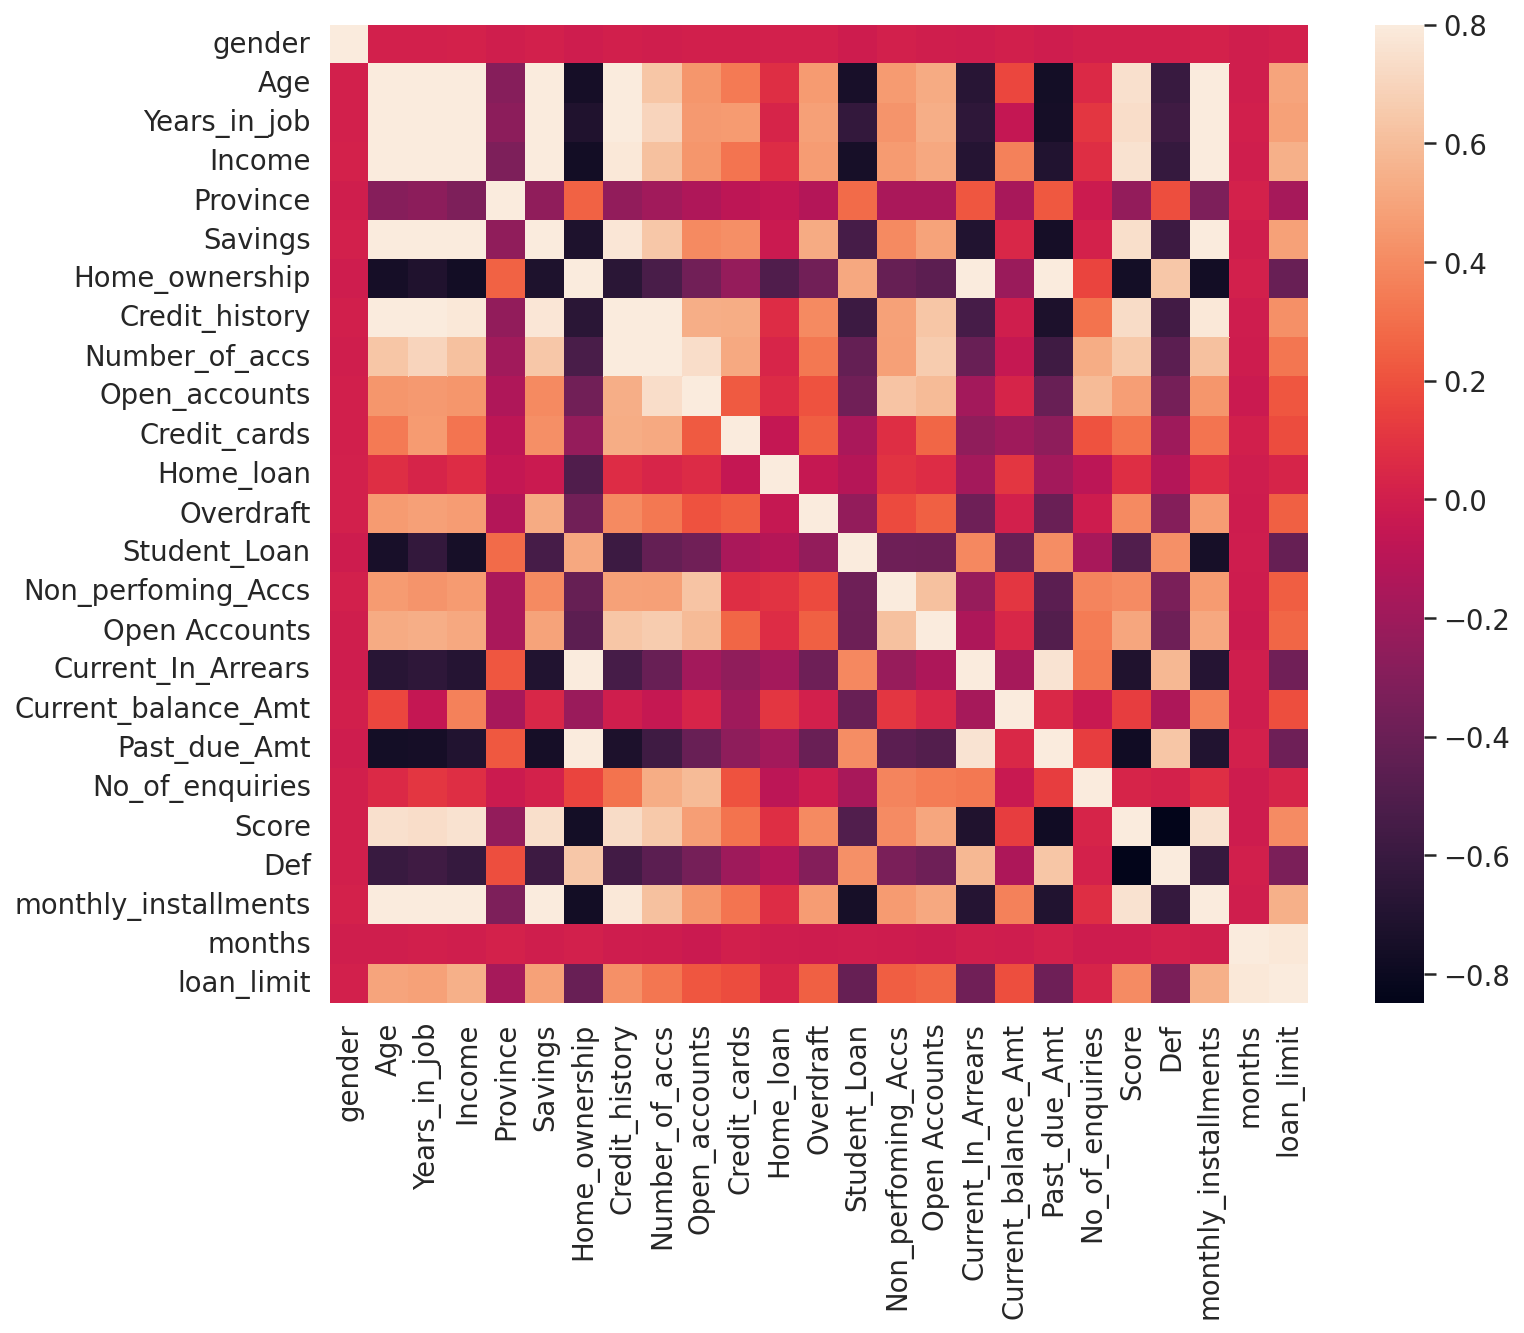

In [115]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

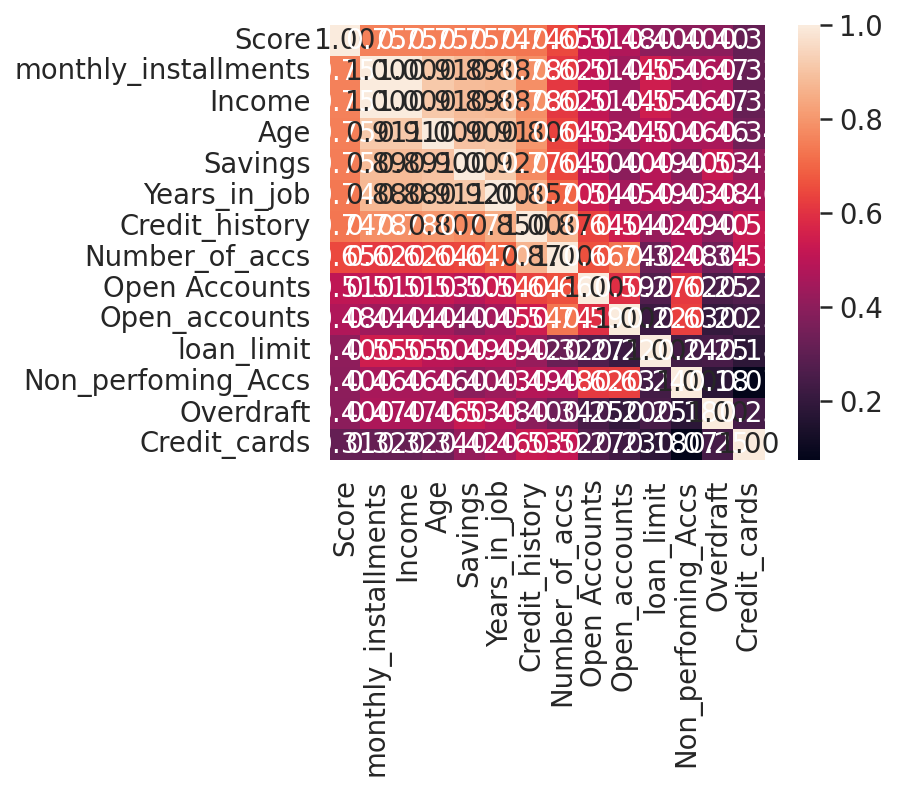

In [116]:
# Top 10 Heatmap
k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Score')['Score'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [117]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Score']
most_corr

,Score
0,Score
1,monthly_installments
2,Income
3,Age
4,Savings
5,Years_in_job
6,Credit_history
7,Number_of_accs
8,Open Accounts
9,Open_accounts


In [118]:
cols

Index(['Score', 'monthly_installments', 'Income', 'Age', 'Savings',
       'Years_in_job', 'Credit_history', 'Number_of_accs', 'Open Accounts',
       'Open_accounts', 'loan_limit', 'Non_perfoming_Accs', 'Overdraft',
       'Credit_cards'],
      dtype='object')

In [119]:
df2=data[cols]

In [120]:
X=data.drop(['Score','loan_limit'],1)
Y=data[['Score','loan_limit']]


In [121]:
X.shape, Y.shape

((10000, 23), (10000, 2))

## 6. Modeling and Predictions

In [122]:
# !pip install catboost

In [123]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_error
from math import sqrt
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import ExtraTreesRegressor

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=300)

In [125]:
model = LinearSVR()
# define the direct multioutput wrapper model
from sklearn.neural_network import MLPRegressor

In [128]:
clfs = {"linear":LinearRegression(),  
            "ridge":Ridge(alpha=0.001), 
            "lasso":Lasso(alpha=1.0, random_state=2),
            'Decision Tree':DecisionTreeRegressor(random_state=2),
             'Extra Trees':ExtraTreesRegressor(random_state=2,n_estimators=200,min_samples_split=3),
            "Random forest":RandomForestRegressor(random_state=2,n_estimators=200,min_samples_split=3),
            'KNN': KNeighborsRegressor()}

In [129]:

models_report = pd.DataFrame(columns = ['Model', 'MAE','RMSE', 'R_squared'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'MAE': mean_absolute_error(y_test, y_pred),                     
                     'RMSE': sqrt(mean_squared_error(y_test, y_pred)),
                     'R_squared': r2_score(y_test, y_pred)}
                     
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,MAE,RMSE,R_squared
0,linear,13051.922051,24246.718044,0.897209
1,ridge,13051.921825,24246.717755,0.897209
2,lasso,13051.771292,24245.815652,0.893050
3,Decision Tree,208.958250,424.221355,0.679520
4,Extra Trees,78.572408,135.914992,0.823353
5,Random forest,125.872264,229.463614,0.813425
6,KNN,41297.238600,73420.026956,0.435787


In [130]:
etree=ExtraTreesRegressor(random_state=2)
etree.fit(x_train,y_train)
y_pred=etree.predict(x_test)

In [131]:
MAE=mean_absolute_error(y_test,y_pred),
RMSE=np.sqrt(mean_squared_error(y_test,y_pred)),
R2_SCORE=r2_score(y_test, y_pred)
print(MAE,RMSE,R2_SCORE)

(80.48073250000014,) (147.2365481229948,) 0.8253458616999547


In [132]:
pred=np.int_(etree.predict(data.drop(['Score','loan_limit'],axis=1)))

In [133]:
pred=pd.DataFrame(pred, columns=['Score_pred','loan_limit'])
pred['Score']=data['Score']
pred['Current_balance_Amt']=data['loan_limit']
pred.head(20)

,Score_pred,loan_limit,Score,Current_balance_Amt
0,728,332049,728,332049.0
1,428,119844,428,119844.0
2,630,319131,630,319131.0
3,504,220649,504,220649.0
4,425,115737,592,115749.0
5,656,160242,656,160242.0
6,712,482632,750,482814.0
7,661,154586,661,154586.0
8,658,337506,658,337506.0
9,461,71469,391,71389.0


In [134]:
pred.shape

(10000, 4)

In [135]:
# Import pickle Package

import pickle

In [94]:
# Save the Modle to file in the current working directory
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rforest, file)

In [95]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=200, n_jobs=None, oob_score=False,
                    random_state=2, verbose=0, warm_start=False)

In [96]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2857 to 1233
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                8000 non-null   int64  
 1   Age                   8000 non-null   int64  
 2   Years_in_job          8000 non-null   int64  
 3   Income                8000 non-null   int64  
 4   Province              8000 non-null   int64  
 5   Marital_status        8000 non-null   int64  
 6   Savings               8000 non-null   int64  
 7   Home_ownership        8000 non-null   int64  
 8   Credit_history        8000 non-null   int64  
 9   Number_of_accs        8000 non-null   int64  
 10  Open_accounts         8000 non-null   int64  
 11  Credit_cards          8000 non-null   int64  
 12  Home_loan             8000 non-null   int64  
 13  Overdraft             8000 non-null   int64  
 14  Student_Loan          8000 non-null   int64  
 15  Perfoming_Accs    

In [ ]:
x_train['Score'].value_counts() #short or long term

661    57
671    55
709    50
691    49
702    48
       ..
218     1
249     1
241     1
225     1
252     1
Name: Score, Length: 549, dtype: int64

##Using Neural Network

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    
    
    
    model.add(Dense(16, input_dim=24, activation='relu'))
    
    
    model.add(Dense(8, input_dim=24, activation='relu'))
    
    
    model.add(Dense(2))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=30, batch_size=3, verbose=1)


In [ ]:
history=estimator.fit(x_train,y_train)


Epoch 1/30
2667/2667 [==============================] - 3s 1ms/step - loss: 7230563.0000
Epoch 2/30
2667/2667 [==============================] - 3s 1ms/step - loss: 3011183.7500
Epoch 3/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2674959.2500
Epoch 4/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2453116.0000
Epoch 5/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2461411.5000
Epoch 6/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2396256.0000
Epoch 7/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2363950.5000
Epoch 8/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2328134.5000
Epoch 9/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2334783.0000
Epoch 10/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2290523.2500
Epoch 11/30
2667/2667 [==============================] - 3s 1ms/step - loss: 2267484.7500
Epoch 12/30
2667/26

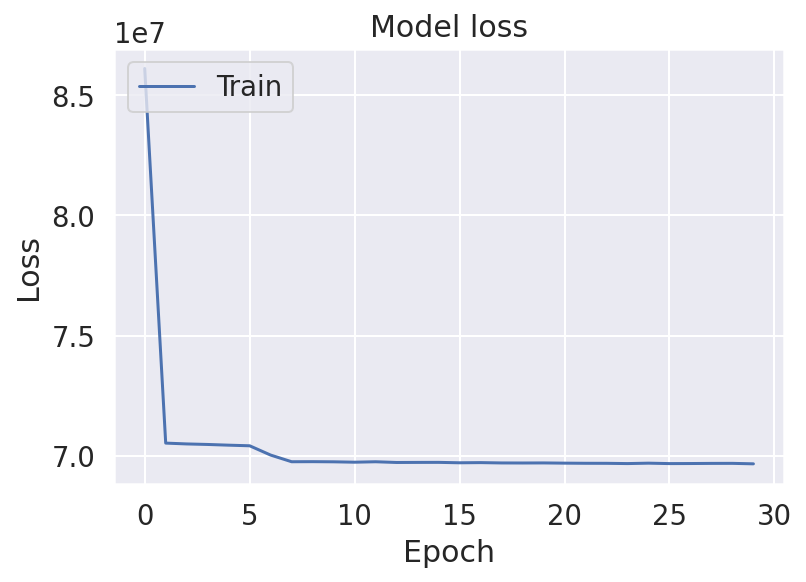

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# prediction=prediction.reshape(2000,2)



In [ ]:
prediction = estimator.predict(x_test)

667/667 [==============================] - 1s 779us/step


In [ ]:
train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [ ]:
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  Score                    69.068418
Current_balance_Amt    1549.393755
dtype: float64
mean_error:  Score                    84.240471
Current_balance_Amt    1306.369433
dtype: float64
min_error:  Score                  0.036102
Current_balance_Amt    0.359375
dtype: float64
max_error:  Score                   396.435120
Current_balance_Amt    6116.064453
dtype: float64


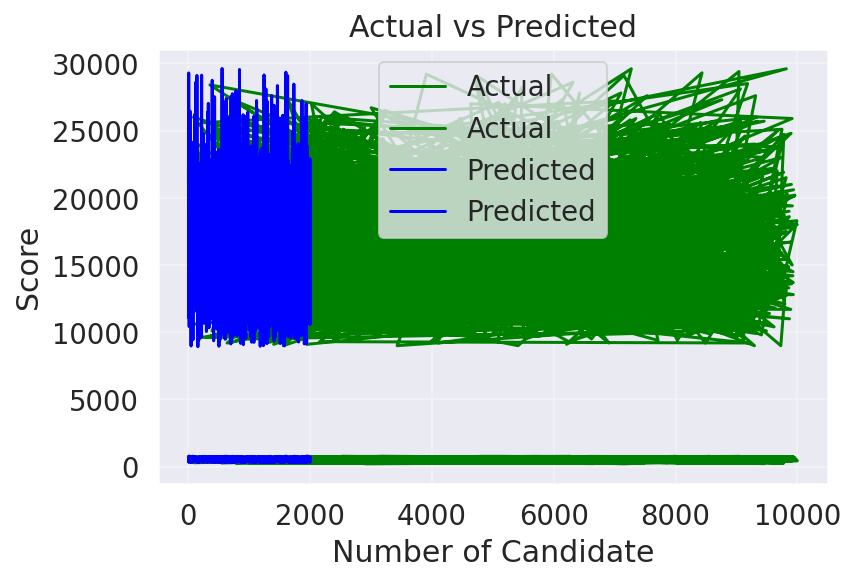

In [ ]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
print("r_square score: ", r2_score(y_test,prediction))
# print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(estimator.predict(x_test[[1],:])))
# print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(estimator.predict(x_test[[2],:])))

# train_prediction = estimator.predict(x_train)
# print("r_square score (train dataset): ", r2_score(y_train,train_prediction))

r_square score:  0.5181969408251325


In [ ]:
# # Save the weights
# estimator.model.save_weights('model_weights.h5')

# # Save the model architecture
# with open('model_architecture.json', 'w') as f:
#     f.write(estimator.model.to_json())

In [ ]:
 #get the model
def get_model(x_train, y_train):
	model = Sequential()
	model.add(Dense(20, input_dim=24, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(2, kernel_initializer='he_uniform'))
	model.compile(loss='mse', optimizer='adam')
	return model
 

# get model
model = get_model(x_train, y_train)
# fit the model on all data
model.fit(x_train, y_train, verbose=0, epochs=100)
# make a prediction for new data
yhat = model.predict(x_test)
print('Predicted: %s' % yhat)

Predicted: [[  575.84186 21162.26   ]
 [  447.3638  17823.33   ]
 [  312.20377 11160.408  ]
 ...
 [  632.9434  20315.582  ]
 [  398.8831  16128.635  ]
 [  721.5352  16445.781  ]]


In [ ]:
MAE=mean_absolute_error(y_test,yhat),
RMSE=np.sqrt(mean_squared_error(y_test,yhat)),
R2_SCORE=r2_score(y_test, yhat)
print(MAE,RMSE,R2_SCORE)

(729.9509991302491,) (1424.7253940539827,) 0.6138317386032527
